In [1]:
from google.colab import files

uploaded = files.upload()

Saving wine.csv to wine.csv


In [4]:
import pandas as pd

df = pd.read_csv('wine.csv')  # Replace with your dataset path

print(df.head())
print(df.info())
print(df.describe())


   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           No

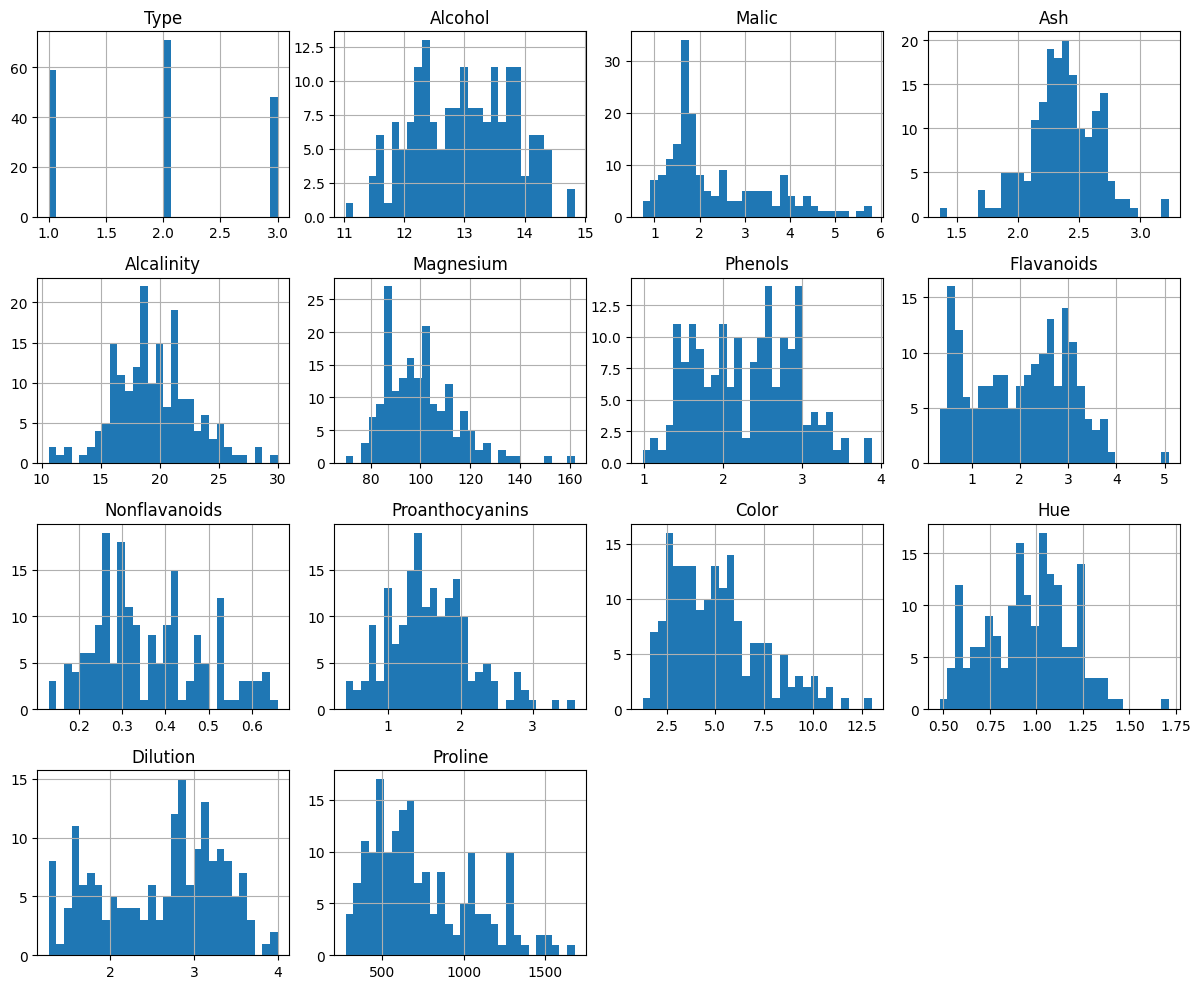

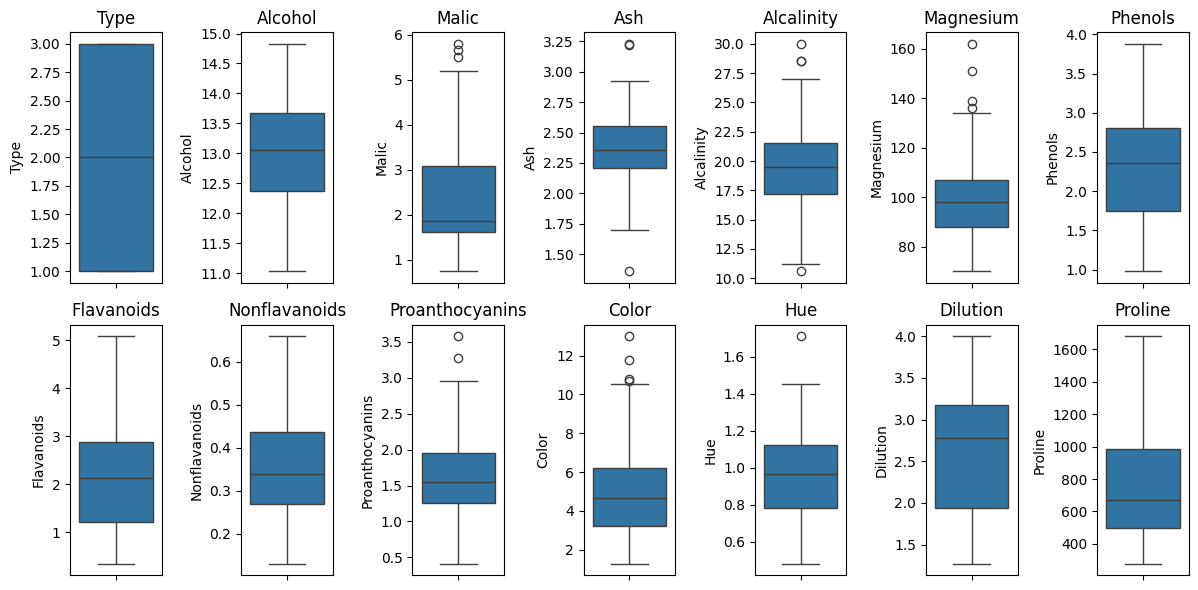

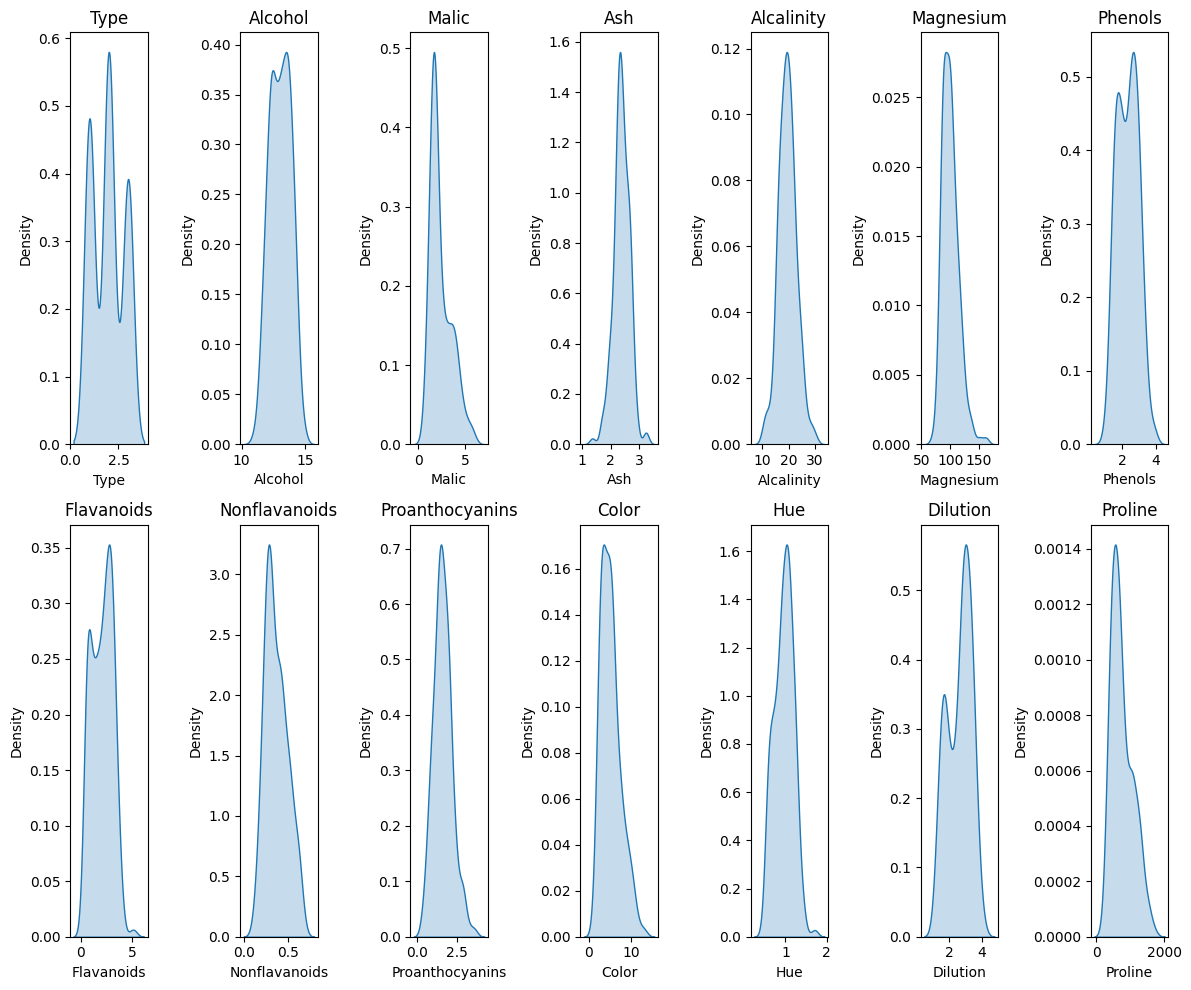

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, len(df.columns)//2, i)
    sns.boxplot(y=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# Density plots
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(2, len(df.columns)//2, i)
    sns.kdeplot(df[column], fill=True)
    plt.title(column)
plt.tight_layout()
plt.show()


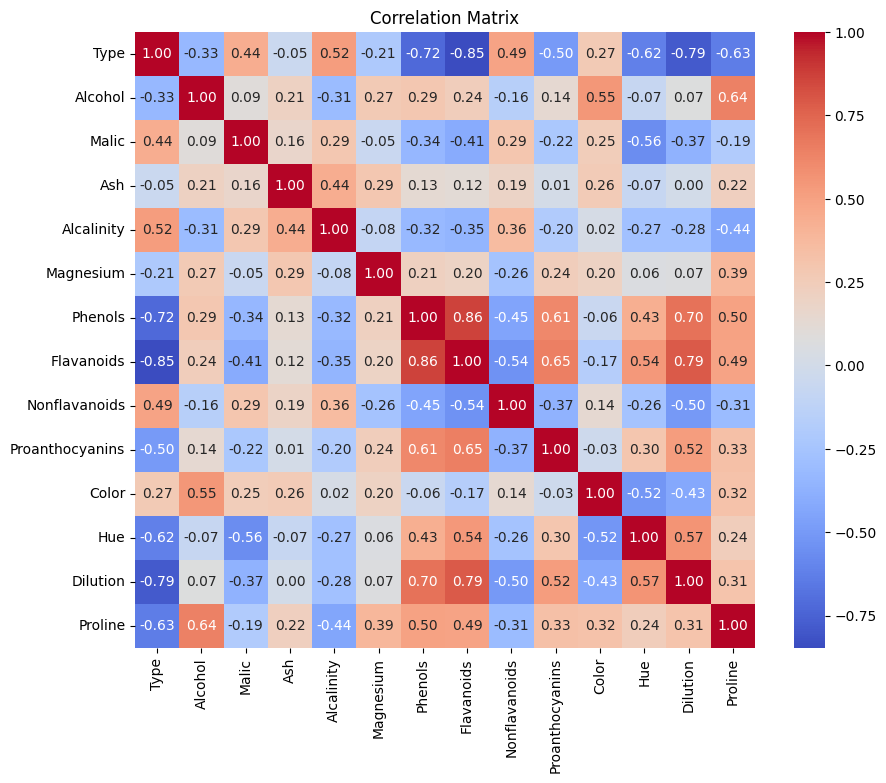

In [6]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [7]:
from sklearn.preprocessing import StandardScaler

# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


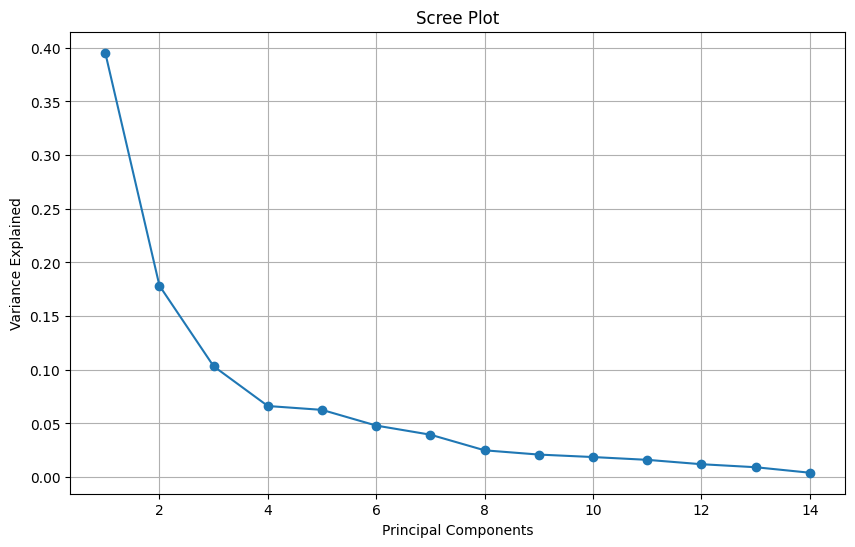

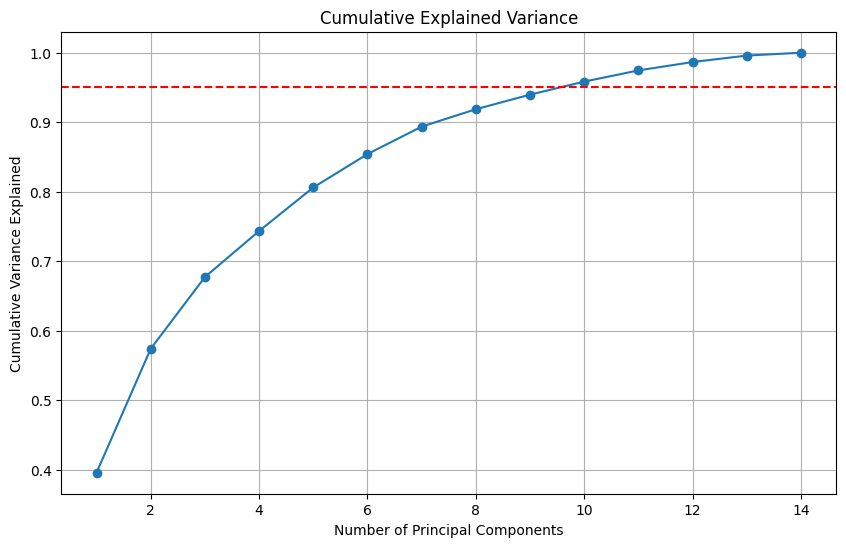

In [8]:
from sklearn.decomposition import PCA

# PCA
pca = PCA()
pca.fit(scaled_data)

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

# Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         cumulative_variance := pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')  # 95% variance threshold
plt.show()


In [13]:
# Transforming the original dataset
pca = PCA(n_components=optimal_n)  # Set optimal_n based on the cumulative explained variance
pca_data = pca.fit_transform(scaled_data)


In [12]:
optimal_n = 8
pca = PCA(n_components=optimal_n)
pca_data = pca.fit_transform(scaled_data)

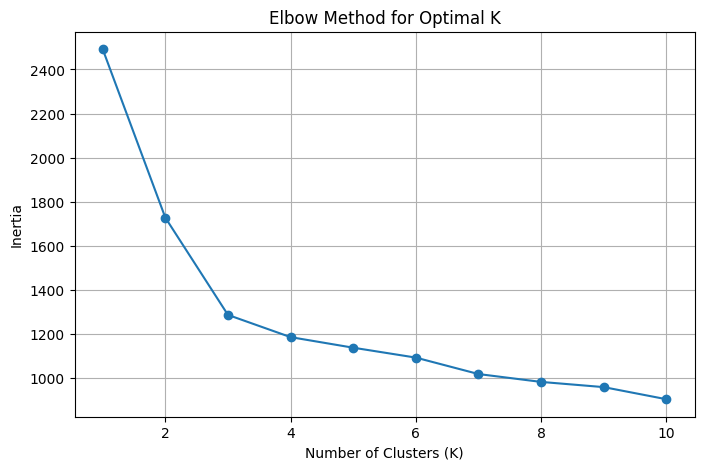

In [14]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

optimal_k = 3  # Set based on the Elbow method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


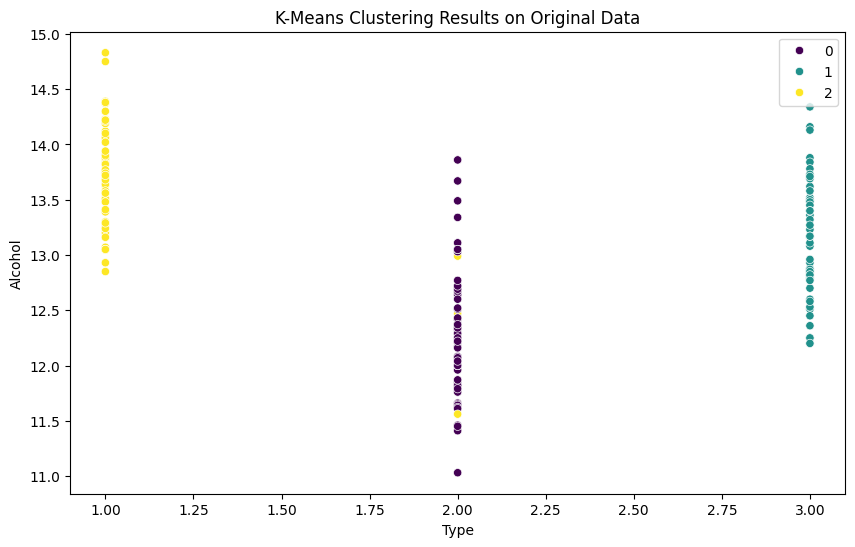

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-Means Clustering Results on Original Data')
plt.show()


In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_kmeans = silhouette_score(scaled_data, kmeans_labels)
davies_bouldin_kmeans = davies_bouldin_score(scaled_data, kmeans_labels)

print(f'Silhouette Score for K-Means: {silhouette_kmeans:.2f}')
print(f'Davies-Bouldin Index for K-Means: {davies_bouldin_kmeans:.2f}')


Silhouette Score for K-Means: 0.31
Davies-Bouldin Index for K-Means: 1.32


In [17]:
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_data)


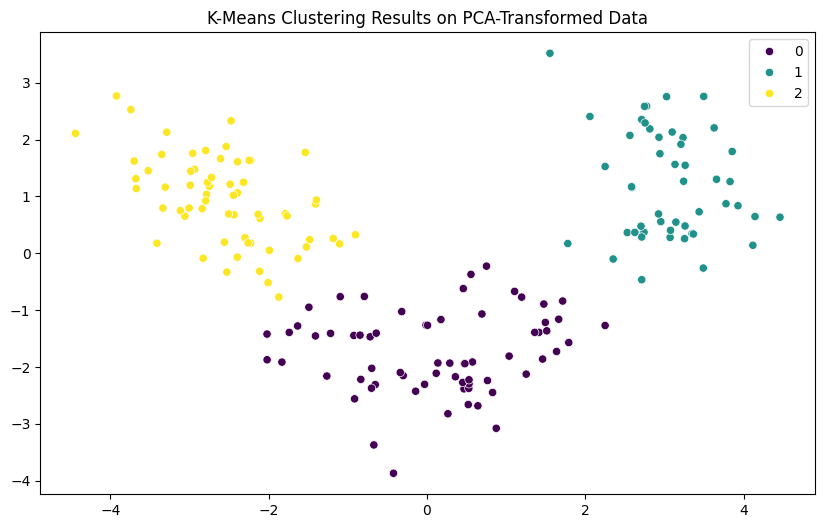

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_pca_labels, palette='viridis')
plt.title('K-Means Clustering Results on PCA-Transformed Data')
plt.show()


Compare Clustering Results
Silhouette Scores: Compare the silhouette scores from the original data and PCA-transformed data.
Davies-Bouldin Index: Compare the indices to assess the clustering quality.
 Discuss Similarities or Differences
Analyze how the clusters formed in PCA data compared to those formed from the original data.
Look for patterns: Did PCA help in creating more distinct clusters?
 Reflect on Impact of Dimensionality Reduction
Discuss whether PCA made the clustering task easier or if it lost significant information.
Consider if PCA improved clustering performance by reducing noise or not.
 Analyze Trade-Offs
Reflect on when to use PCA versus clustering directly on the original dataset.
Consider scenarios where dimensionality reduction is beneficial.
